In [ ]:
'''
These is a segment of R code
ent= function(p) {
q=1-p
result=-p*log2(p)-q*log2(q)
list(result=result)
}

LI =function(i,j) {
p=i/(i+j)
q=1-p
result=-p*log2(p)-q*log2(q)
list(result=result)
}
LI3 = function(i, j, k) {
p=i/(i+j+k)
q=j/(i+j+k)
r=k/(i+j+k)
result = -p*log2(p)-q*log2(q)-r*log2(r)
list(result=result)
}
LI3(2,2,2)
log2(3)
'''

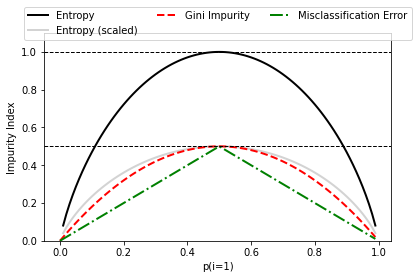

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def gini(p):
    return (p)*(1 - (p)) + (1-p)*(1 - (1-p))

def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]


fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                  ['Entropy', 'Entropy (scaled)', 
                   'Gini Impurity', 'Misclassification Error'],
                  ['-', '-', '--', '-.'],
                  ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)



ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()
plt.savefig('./figures/impurity.png', dpi=300, bbox_inches='tight')
plt.show()

In [2]:
def LI(i,j):
    p=i/(i+j)    
    q=1-p
    if p==0 or q ==0:
        return 0
    else:
        return entropy(p)

In [4]:
LI(11,1)
LI(1,11)

0.41381685030363374

In [5]:
LI(7,5)

0.9798687566511528

In [12]:
LI(9,5)
#LI(4,0)
#(5/14) * LI(2,3) + (5/14) *LI(3,2)
#LI(9,5)-((5/14) * LI(2,3) + (5/14) *LI(3,2))
5/14*LI(2,3) +4/14*0+ 5/14*LI(3,2)
#0.94-(1/2*LI(6,1)+1/2*LI(3,4))

0.6935361388961918

# read the data

In [1]:
from sklearn import datasets
import numpy as np
#import pandas as pd

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))
#iris.data[0:5,]
iris
#X

Class labels: [0 1 2]


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

# pre-process the data

In [4]:
# split dataset into 0.3 testing data and 0.7 training data
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#from sklearn import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

# Standardizing the data

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Perceptron (MLP) is included only for some required functions, will be covered later!

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_test.shape
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot regional graph
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]                               
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]   
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black',
                alpha=1.0, linewidth=1, marker='o', 
                s=55, label='test set')

Misclassified samples: 5
Accuracy: 0.89


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


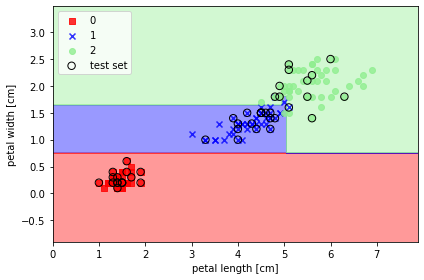

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/decision_tree_decision.png', dpi=300)
plt.show()

In [8]:
y_pred = tree.predict(X_test)

print('Misclassified samples: %d' % (y_test != y_pred).sum())
y_pred

Misclassified samples: 1


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [9]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


# to visualize the tree, need to install the GraphViz program and import its path in the windows


http://www.graphviz.org

In [10]:
from sklearn.tree import export_graphviz
A=['Setosa', 'Versicolor', 'Virginica']
export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names=['petal length', 'petal width'], class_names=A)

In [25]:
#!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


# use: dot  -Tpng tree.dot  -o  tree.png ==>     to create png, and visualize it by clicking on the png file!